In [17]:

#cargamos las bibliotecas a utilizar y asignamos nombres cortos
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [18]:
#creamos un data frame
df0=pd.read_csv('vid18_180219.dat', delimiter = ',')

In [19]:
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [20]:
#creamos un data frame con las columnas de TIMESTAMP y AirTC_Avg
df0=pd.DataFrame({"TIME" : df0.TIMESTAMP,"TEMP" : df0.AirTC_Avg})

df0.head()

,TIME,TEMP
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [21]:
df0.dtypes

TIME     object
TEMP    float64
dtype: object

In [22]:
df0['TIME'] = pd.to_datetime(df0.apply(lambda x: x['TIME'], 1))

In [23]:
df0=df0[(df0["TIME"] > "2018-11-1")]
df0.head()

,TIME,TEMP
24936,2018-11-01 00:10:00,8.89
24937,2018-11-01 00:20:00,8.66
24938,2018-11-01 00:30:00,8.52
24939,2018-11-01 00:40:00,8.47
24940,2018-11-01 00:50:00,8.58


In [24]:
df0['HORA'] = df0['TIME'].dt.hour
df0['DIA'] = df0['TIME'].dt.day
df0["MES"] = df0["TIME"].dt.month
df0["AÑO"] = df0["TIME"].dt.year
#borramos la columna TIME
f=len(df0)
df0.index = np.arange(0,f)
df0 = df0.drop(["TIME"], 1)


In [25]:
df0.head()

,TEMP,HORA,DIA,MES,AÑO
0,8.89,0,1,11,2018
1,8.66,0,1,11,2018
2,8.52,0,1,11,2018
3,8.47,0,1,11,2018
4,8.58,0,1,11,2018


In [26]:
df=pd.DataFrame({})
df["TEMP"]=df0.groupby(["AÑO","MES","DIA","HORA"])["TEMP"].transform("mean")
df.head()

,TEMP
0,8.624
1,8.624
2,8.624
3,8.624
4,8.624


In [27]:
df["TMIN"]=df0.groupby(["AÑO","MES","DIA"])["TEMP"].transform("min")
df["TMAX"]=df0.groupby(["AÑO","MES","DIA"])["TEMP"].transform("max")
df["HORA"]=df0.HORA
df["DIA"]=df0.DIA
df["MES"]=df0.MES
df["AÑO"]=df0.AÑO
df.head()

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO
0,8.624,6.096,29.58,0,1,11,2018
1,8.624,6.096,29.58,0,1,11,2018
2,8.624,6.096,29.58,0,1,11,2018
3,8.624,6.096,29.58,0,1,11,2018
4,8.624,6.096,29.58,0,1,11,2018


In [28]:
#tiramos las filas duplicadas
df=df.drop_duplicates()
f=len(df)
df.index = np.arange(0,f)
df.head()

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO
0,8.624000,6.096,29.58,0,1,11,2018
1,8.493333,6.096,29.58,1,1,11,2018
2,8.690000,6.096,29.58,2,1,11,2018
3,8.846667,6.096,29.58,3,1,11,2018
4,7.397500,6.096,29.58,4,1,11,2018


In [29]:
#Calculamos el indice UF24
count=[]
for i in range (0,len(df)):
    z=df.TEMP[i]
    if (z<1.4) :
        j=0
    if (z>=1.5 and z<=2.4) :
        j=0.5   
    if (z>=2.5 and z<=9.1) :
        j=1
    if (z>=9.2 and z<=12.4) :
        j=0.5  
    if (z>=12.5 and z<=15.9) :
        j=0
    if (z>=16 and z<=18) :
        j=-0.5
    if (z>18) :
        j=-1
    count.append(j)
df["UF24"]=count

In [30]:
df.head()

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO,UF24
0,8.624000,6.096,29.58,0,1,11,2018,1.0
1,8.493333,6.096,29.58,1,1,11,2018,1.0
2,8.690000,6.096,29.58,2,1,11,2018,1.0
3,8.846667,6.096,29.58,3,1,11,2018,1.0
4,7.397500,6.096,29.58,4,1,11,2018,1.0


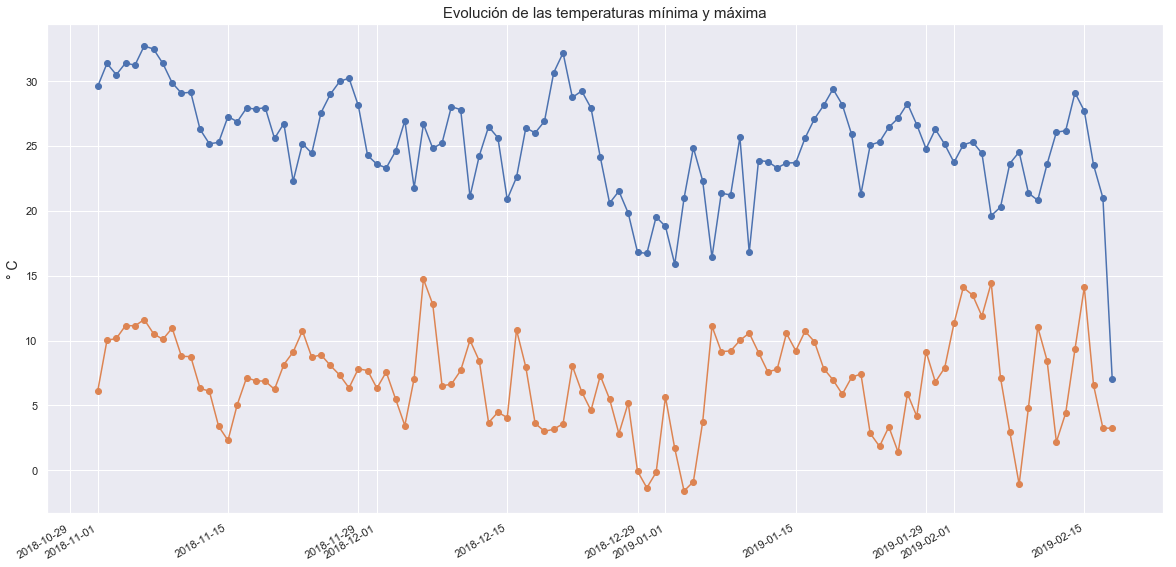

In [102]:
#Graficamos la evolucion de la TMAX y TMIN
#para ello debemos eliminar duplicados
#df1=df
df1=df.drop(["TEMP", "HORA", "UF24"],1)
df1=df1.drop_duplicates()
f=len(df1)
df1.index = np.arange(0,f)
df1.head()



df2=pd.DataFrame({})
df2["day"]=df1.DIA
df2["month"]=df1.MES
df2["year"]=df1.AÑO
df2.index = np.arange(0,f)
df2.head()
j=pd.to_datetime(df2)

df1["FECHA"]=j

sns.set(rc={'figure.figsize':(12,9)})

#ya que no tenemos ningun dato duplicado podemos graficar
fig, ax = plt.subplots(figsize=(20, 10))

#plt.plot_date(x=df1.FECHA, y=df1.TMAX, fmt="orange")
#plt.plot_date(x=df1.FECHA, y=df1.TMIN, fmt="blue")
ax.plot(df1.FECHA, df1.TMAX, 'o-')
ax.plot(df1.FECHA, df1.TMIN, 'o-')
plt.title("Evolución de las temperaturas mínima y máxima", size=15)
plt.ylabel("° C", size=14)

fig.autofmt_xdate()

plt.show()






In [68]:
df.head()

,TEMP,TMIN,TMAX,HORA,DIA,MES,AÑO,UF24
0,8.624000,6.096,29.58,0,1,11,2018,1.0
1,8.493333,6.096,29.58,1,1,11,2018,1.0
2,8.690000,6.096,29.58,2,1,11,2018,1.0
3,8.846667,6.096,29.58,3,1,11,2018,1.0
4,7.397500,6.096,29.58,4,1,11,2018,1.0


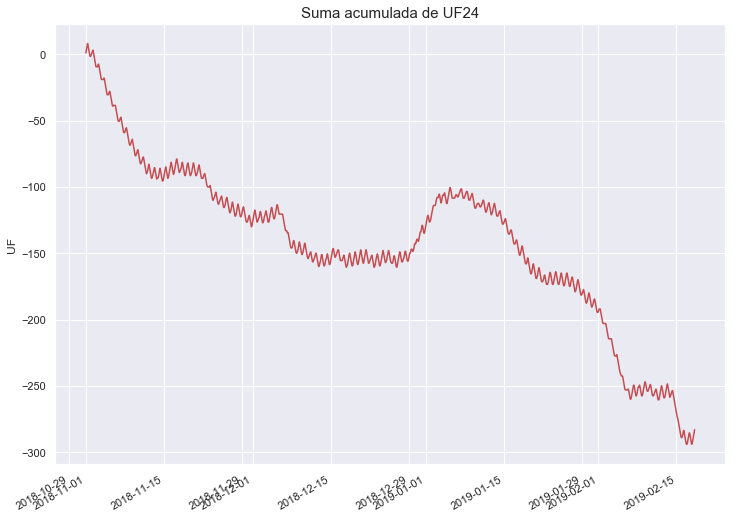

In [96]:
df3=df.drop(["TEMP", "TMIN","TMAX"],1)
df3=df3.drop_duplicates()
f=len(df3)
df3.index = np.arange(0,f)
df3.head()

df2=pd.DataFrame({})
df2["day"]=df3.DIA
df2["month"]=df3.MES
df2["year"]=df3.AÑO
df2["hour"]=df3.HORA
df2.index = np.arange(0,f)
df2.head()
j=pd.to_datetime(df2)

df3["FECHA"]=j
df3["SUF"]=df3["UF24"].cumsum()
#ya que no tenemos ningun dato duplicado podemos graficar
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot_date(df3.FECHA, df3.SUF, fmt="-r")
plt.title("Suma acumulada de UF24", size=15)
plt.ylabel("UF")
fig.autofmt_xdate()
plt.show()
